📒 [NB 3-2] 다변량 시각화 및 집단 비교
1. 데이터 준비
변수(Feature) 간의 관계를 파악하기 위해 그룹 정보(범주형)와 생체 정보(수치형)가 혼합된 데이터를 생성한다.

In [1]:
!pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(123)
n = 300

# 3가지 질병 그룹 생성
diagnosis_groups = ['Normal', 'Diabetes', 'Hypertension']
diagnosis = np.random.choice(diagnosis_groups, n, p=[0.4, 0.3, 0.3])

# 그룹별로 다른 특성을 갖도록 데이터 생성
age = np.random.randint(30, 80, n)
bmi = np.random.normal(23, 3, n)
sbp = np.random.normal(120, 10, n) # 혈압

# 데이터프레임 생성
df = pd.DataFrame({'Diagnosis': diagnosis, 'Age': age, 'BMI': bmi, 'SBP': sbp})

# 질병 그룹에 따라 수치 조작 (패턴 부여)
# 당뇨 환자는 BMI를 높게, 고혈압 환자는 혈압을 높게 설정
df.loc[df['Diagnosis'] == 'Diabetes', 'BMI'] += 5
df.loc[df['Diagnosis'] == 'Hypertension', 'SBP'] += 20
df.loc[df['Diagnosis'] == 'Hypertension', 'Age'] += 10 # 고혈압 환자 나이 증가

print("그룹별 데이터 개수:")
print(df['Diagnosis'].value_counts())

그룹별 데이터 개수:
Diagnosis
Normal          119
Diabetes         97
Hypertension     84
Name: count, dtype: int64


2. 범주형 vs 수치형: 집단 간 분포 비교
"진단명(Categorical)에 따라 혈압(Numerical)이 다른가?"를 시각화한다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34292\1115968471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='SBP', data=df, palette='Set2')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34292\1115968471.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diagnosis', y='SBP', data=df, palette='Set2')


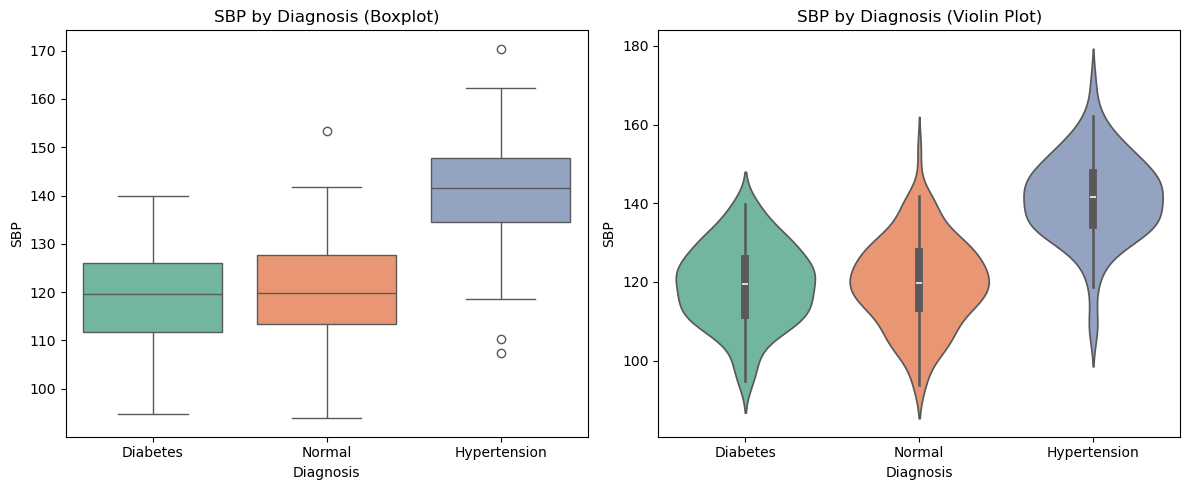

In [2]:
plt.figure(figsize=(12, 5))

# 1. Boxplot: 요약 통계량 비교
plt.subplot(1, 2, 1)
sns.boxplot(x='Diagnosis', y='SBP', data=df, palette='Set2')
plt.title('SBP by Diagnosis (Boxplot)')

# 2. Violin Plot: 데이터 분포의 밀도까지 비교
plt.subplot(1, 2, 2)
sns.violinplot(x='Diagnosis', y='SBP', data=df, palette='Set2')
plt.title('SBP by Diagnosis (Violin Plot)')

plt.tight_layout()
plt.show()

3. 수치형 vs 수치형: 상관관계 시각화 (Scatter Plot)
"나이가 많을수록 혈압도 높은가?"와 같은 두 연속형 변수의 관계를 본다. hue 옵션을 사용하여 그룹별 패턴을 구분한다.

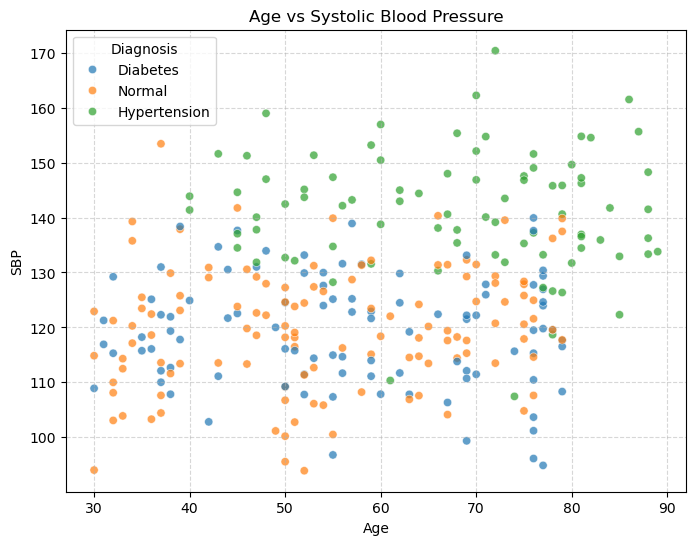

In [3]:
plt.figure(figsize=(8, 6))

# 나이(Age)와 혈압(SBP)의 관계, 색상(hue)은 진단명으로 구분
sns.scatterplot(x='Age', y='SBP', hue='Diagnosis', data=df, alpha=0.7)

plt.title('Age vs Systolic Blood Pressure')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

4. 산점도와 회귀선 (Regplot)
전체 경향성(추세선)을 그린다.

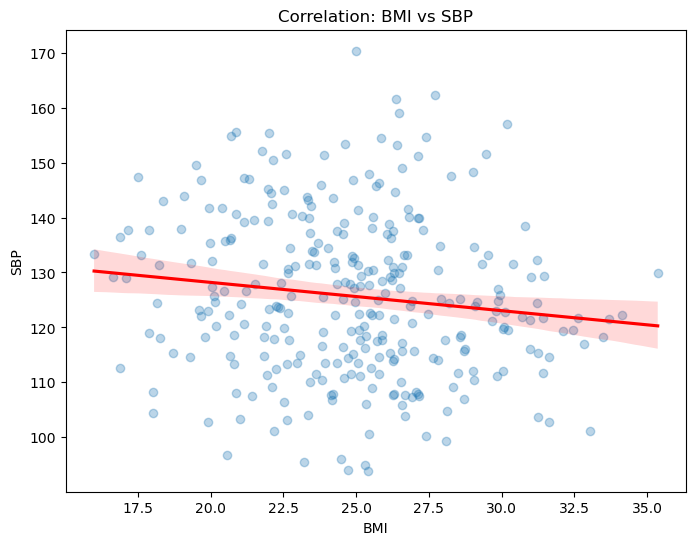

In [4]:
plt.figure(figsize=(8, 6))
# regplot은 hue 지원이 제한적이므로 lmplot 사용 권장하나, 여기선 전체 경향 확인용으로 사용
sns.regplot(x='BMI', y='SBP', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation: BMI vs SBP')
plt.show()